# 🚢 Titanic Dataset Analysis: Survival Insights & Predictive Modeling

## 📌 Objective
The goal of this project is to analyze the **Titanic dataset** to understand the factors affecting passenger survival. We will:
- Perform **Exploratory Data Analysis (EDA)**
- **Visualize** survival trends across different features

## 📂 Dataset Information
The dataset contains information about **891 passengers** on the Titanic, including:
- **Demographics** (Age, Sex, Class)
- **Family Relations** (Siblings, Parents/Children aboard)
- **Ticket & Fare Details**
- **Survival Status (Target Variable)**


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"F:\Data Science\Python\Project\Titanic EDA\taitanic.csv")

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis **(EDA)**

## How many survived?

In [7]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

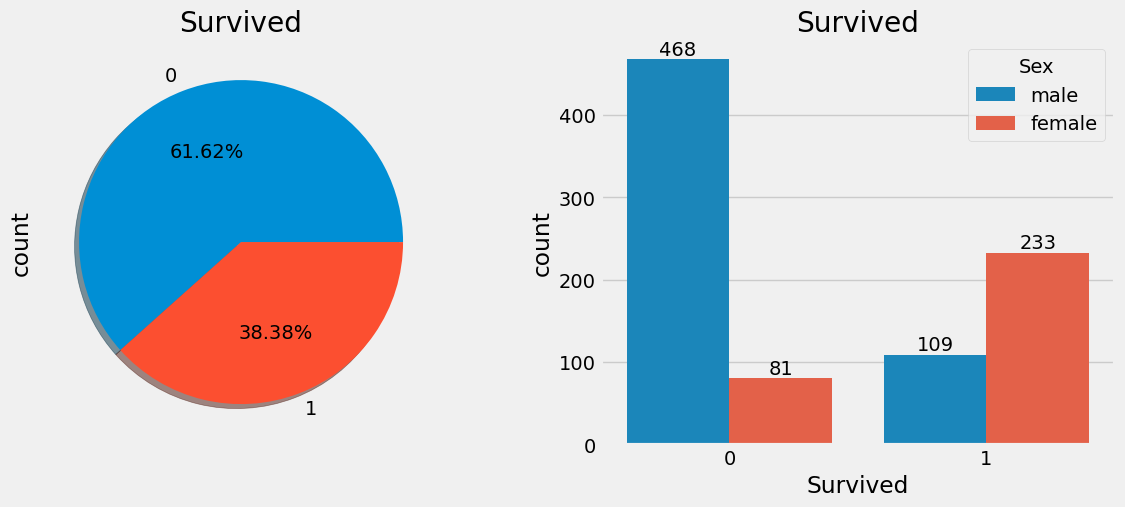

In [8]:
f,axe = plt.subplots(1, 2, figsize=(13,5))

data['Survived'].value_counts().plot.pie(autopct='%.2f%%', ax=axe[0], shadow=True)
axe[0].set_title('Survived')

#datalabel= sns.countplot(x=data['Survived'], ax=ax[1])
datalabel= sns.countplot(x=data['Survived'], ax=axe[1], hue="Sex",data=data)
axe[1].set_title('Survived')
for i in datalabel.containers:
    datalabel.bar_label(i,)
plt.show()

#### **Pie Chart (Left) – Overall Survival Distribution**  
- This chart represents the results indicate:  
  - **61.62% of passengers did not survive** (label "0").  
  - **38.38% of passengers survived** (label "1").  
#### **Count Plot (Right) – Survival by Gender**  
- This chart compares **survival counts** for males and females.  
  - **Most men did not survive**, as their bar is significantly higher in the "0" (non-survived) category.  
  - **More women survived**, aligning with the historical "women and children first" policy.  
  - The **number of male survivors is much lower** compared to female survivors.   
#### **Key Takeaways**  
1. **Overall, the majority of passengers did not survive.**  
2. **Survival rates differ significantly by gender:**
   - **Women had a much higher survival rate** than men.  
   - **Most male passengers did not survive.**  

### Pclass --> Ordinal Feature
#### How many Survived based on Pclass??

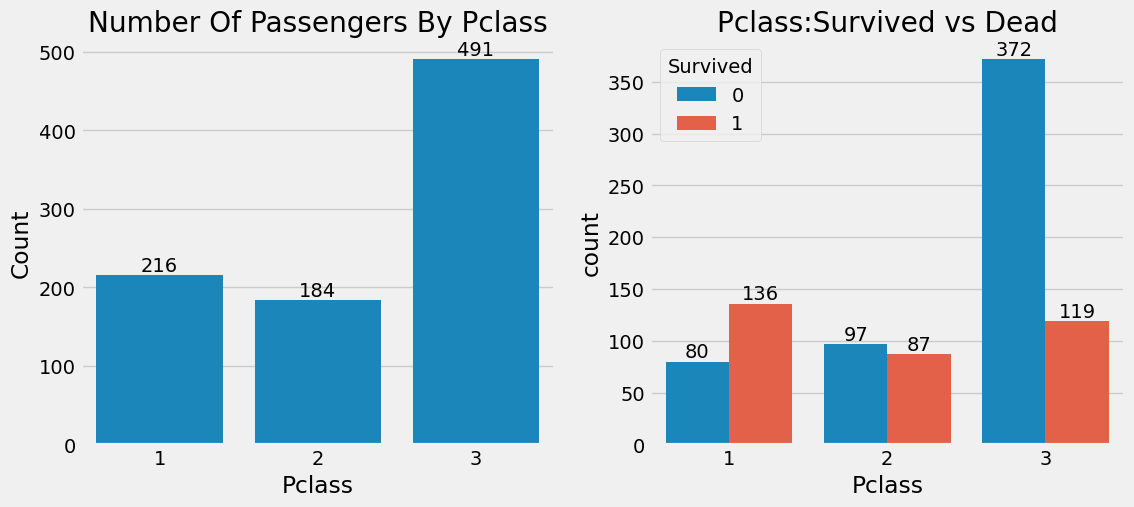

In [9]:
f,ax=plt.subplots(1,2,figsize=(12,5))

#datalabel=data['Pclass'].value_counts().plot.bar(color=['#75FA8D','#FFDF00','#D3D3D3'],ax=ax[0])
datalabel=sns.countplot(x='Pclass',data=data,ax=ax[0])
for i in datalabel.containers:
    datalabel.bar_label(i)
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')


datalabel=sns.countplot(x='Pclass',hue='Survived', data=data,ax=ax[1])

for i in datalabel.containers:
    datalabel.bar_label(i)
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### 1️⃣ Number of Passengers by Class
- The third class (Pclass = 3) had the highest number of passengers (491).
- First-class had 216 passengers, and second-class had 184.
- This suggests that most passengers were in the lower class.

### 2️⃣ Survival vs. Death by Class
- **First-class:** 136 survived, 80 died (Higher survival rate).
- **Second-class:** 87 survived, 97 died (Moderate survival rate).
- **Third-class:** 119 survived, 372 died (Lowest survival rate).
- Higher-class passengers had a better chance of survival.

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

## Crosstabulation

In [10]:
pd.crosstab(data.Pclass, data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [11]:
pd.crosstab(data.Survived, data.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [12]:
pd.crosstab([data.Sex, data.Survived], data.Pclass)

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

<Axes: xlabel='Sex,Survived'>

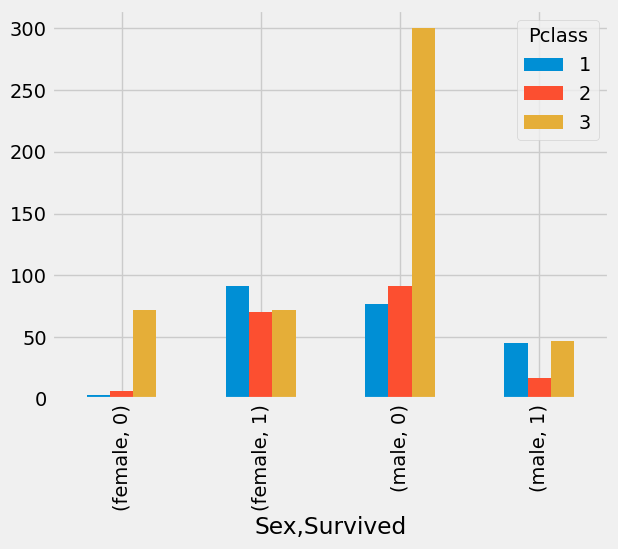

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass).plot.bar()

<Axes: xlabel='Sex,Survived'>

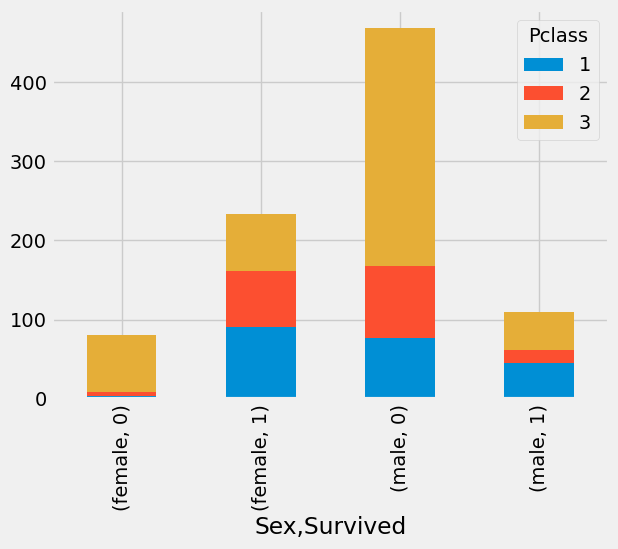

In [14]:
pd.crosstab([data.Sex,data.Survived],data.Pclass).plot.bar(stacked=True)

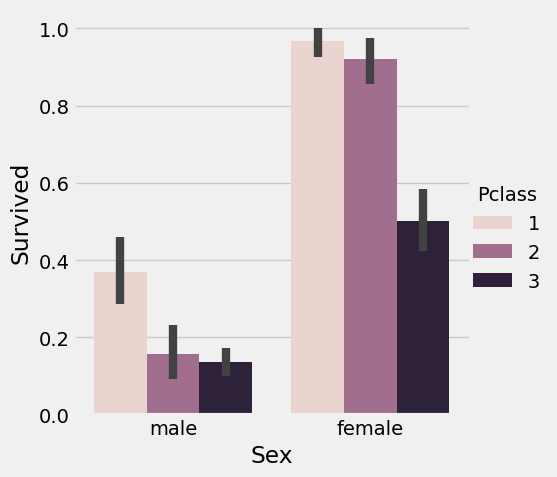

In [15]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=data) #col="Pclass",

plt.show()

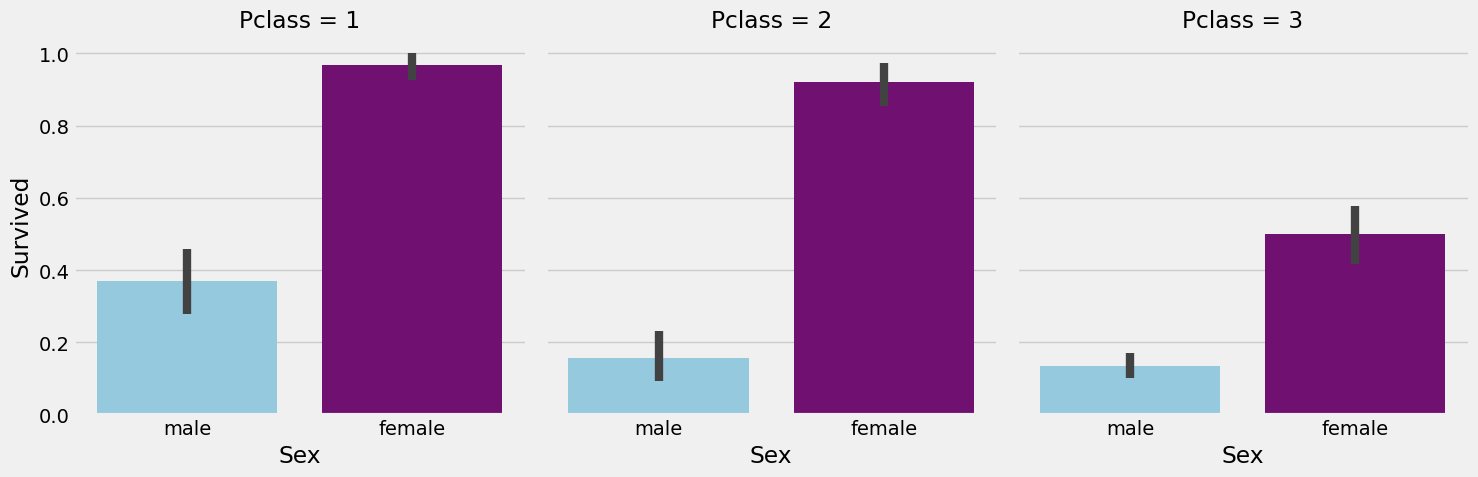

In [16]:
sns.catplot(x="Sex", y="Survived", col="Pclass", kind="bar", hue="Sex", palette={"male": "skyblue", "female": "purple"}, data=data)


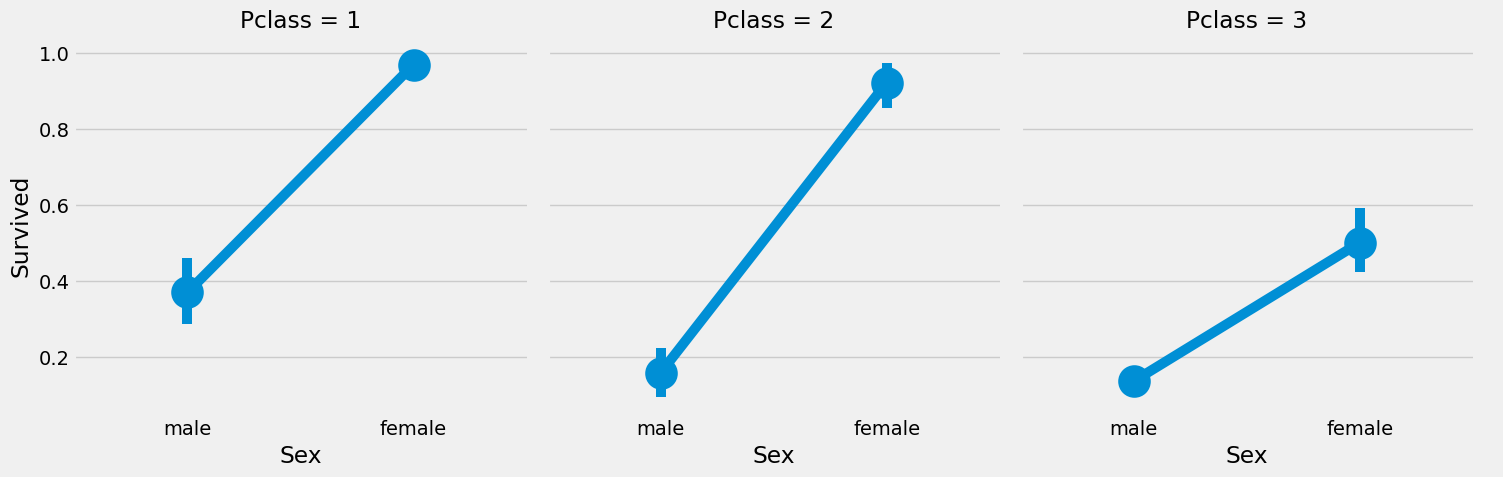

In [17]:
sns.catplot(x="Sex", y="Survived", col="Pclass", kind="point", data=data)

plt.show()

We can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

## Age--> Continous Feature

In [18]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [20]:
data[(data['Age']==0.42) | (data['Age']==80.0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


## Interpretation:
- The youngest passanger name was Thomas, Master. Assad Alexander and the age 0.42 years.

- And the oldest passanger name was Barkworth, Mr. Algernon Henry Wilson, and the age 80 years.


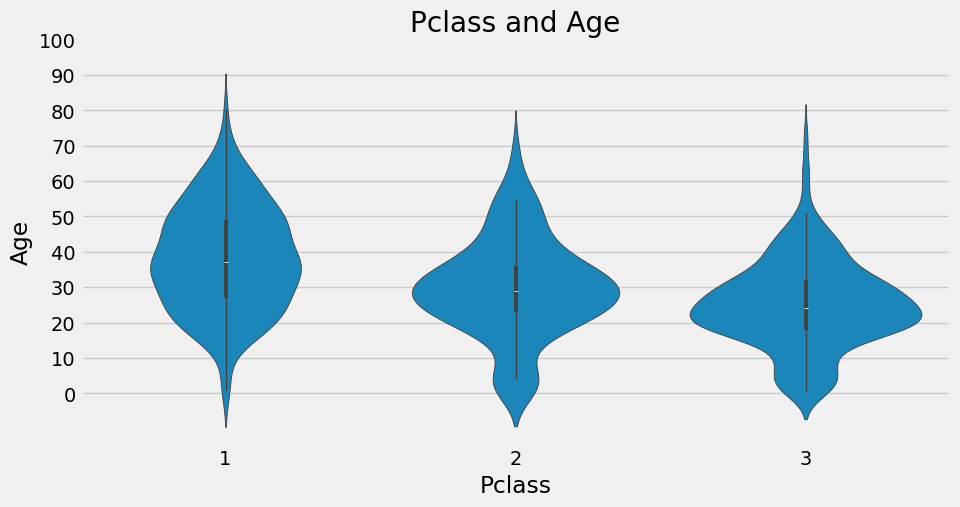

In [21]:
# violin plot
f,ax=plt.subplots(figsize=(10,5))

sns.violinplot(x="Pclass",y="Age", data=data, ax=ax)
ax.set_title('Pclass and Age')
ax.set_yticks(range(0,110,10))
plt.show()

## 📊 Interpretation of the Violin Plot (Pclass vs Age)
**1️.  Overall Age Distribution by Class**

**1st Class (Pclass = 1)**

* Passengers had a wider age range (from infants to 80+ years).
* The median age is around 40 years.
* The distribution is relatively even, but there is a higher density of middle-aged passengers (30-50 years).

**2nd Class (Pclass = 2)**

* The age distribution is somewhat similar to 1st class but shifted slightly younger.
* The median age is around 30 years.
* Fewer older passengers compared to 1st class.

**3rd Class (Pclass = 3)**

* Contains the youngest passengers, including many children.
* The median age is around 25 years.
* There are fewer older passengers (50+ years), indicating that this class was mostly occupied by younger people and families.

**2. Insights from the Plot**

* 1st Class passengers were generally older, likely because wealthier, older individuals could afford premium tickets.
* 3rd Class passengers were generally younger, possibly consisting of immigrants or labor-class individuals with families.
* The density of younger passengers is higher in 3rd class, suggesting that many young families traveled in this category.
""")

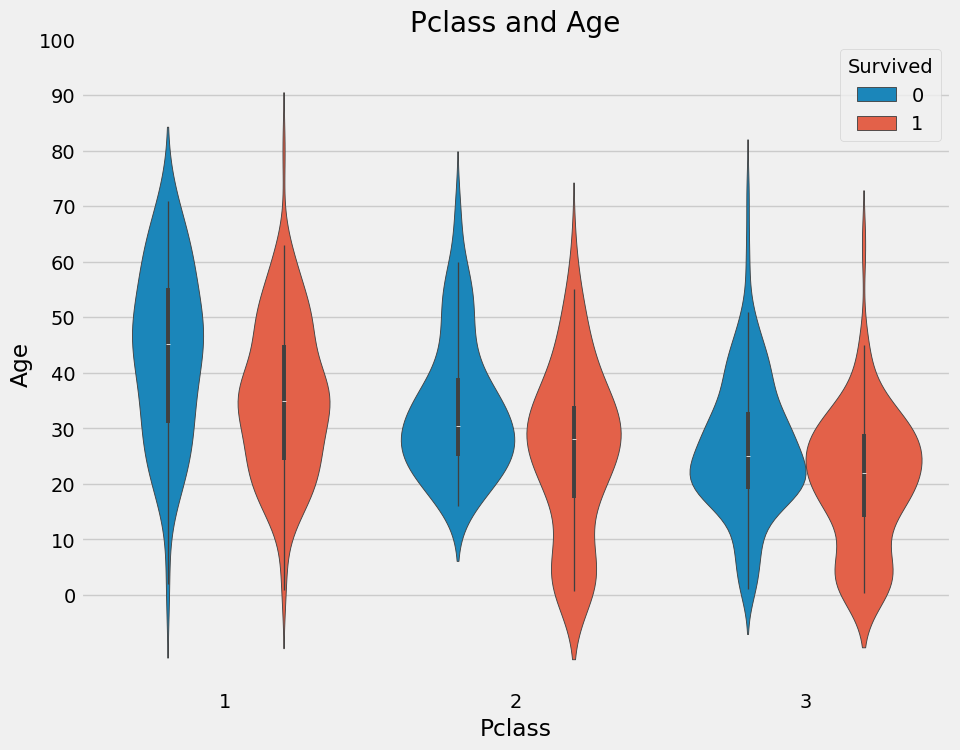

In [22]:
# violin plot
f,ax=plt.subplots(figsize=(10,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data, ax=ax)
ax.set_title('Pclass and Age')
ax.set_yticks(range(0,110,10))
plt.show()

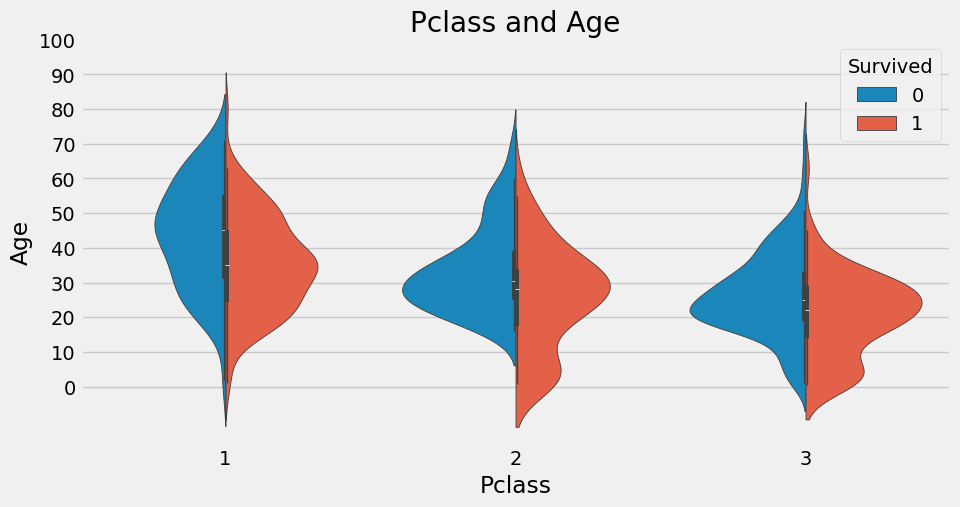

In [23]:
# violin plot
f,ax=plt.subplots(figsize=(10,5))
sns.violinplot(x="Pclass",y="Age", hue="Survived",split=True, data=data, ax=ax)
ax.set_title('Pclass and Age')
ax.set_yticks(range(0,110,10))
plt.show()

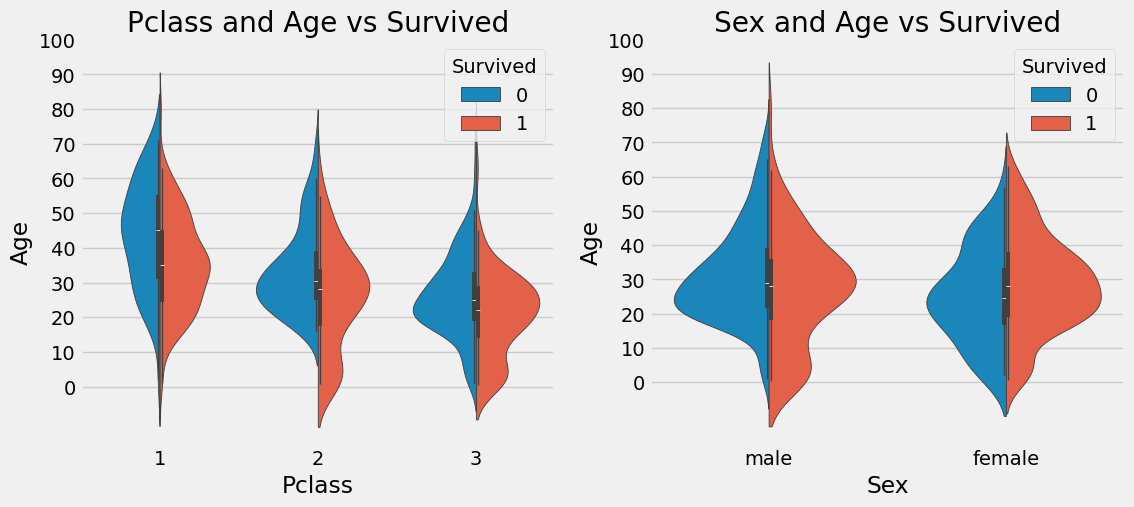

In [24]:
# violin plot
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex",y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations:

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.
As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!!**, we can check the **Name**  feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**''What's In A Name??''**---> **Feature**  :p

In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


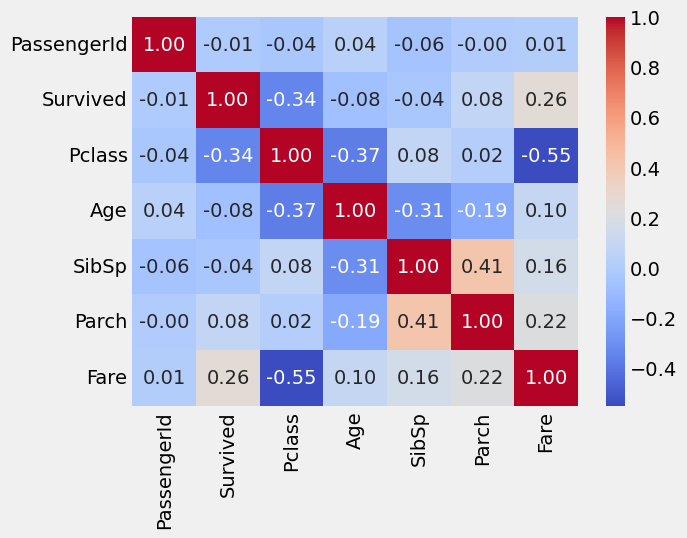

In [26]:
# Select only numeric columns for correlation
corr_matrix = data.corr(numeric_only=True)  # Fix for pandas versions >=1.5.0

# Create heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")  # 'annot=True' shows values in the heatmap

# Show the plot
plt.show()

## Interpretation the Correlation Heatmap
### 🔹 Survival Analysis  
- **Survived & Fare (+0.26)** → Passengers who paid higher fares had a better chance of survival.  
- **Survived & Pclass (-0.34)** → Higher-class passengers had a better survival rate (Pclass 1 had higher survival).  
### 🔹 Class & Economic Factors  
- **Pclass & Fare (-0.55)** → Lower-class passengers (Pclass 3) generally paid lower fares.  
### 🔹 Family Relations  
- **SibSp & Parch (+0.41)** → Number of siblings/spouses correlates with the number of parents/children (families traveled together).  
### 🔹 Age & Social Factors  
- **Age & Pclass (-0.37)** → Older passengers were more likely to be in first class.  
- **Age & SibSp (-0.31)** → Younger passengers were more likely to have siblings/spouses with them.  
## Observations   
- Wealthier passengers (high fare, first-class) had higher survival chances.
- Families often traveled together, as seen in the correlation between SibSp and Parch.
- Older passengers were more likely in first class, while younger passengers had more family members.